<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-24 20:54:33.890130


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

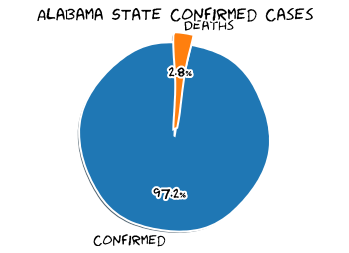

Alabama State Total Population
4887871
Alabama State Confirmed
32064 (0.6559911257887124% of population)
Alabama State Deaths
891 (2.778817365269461% of confirmed)



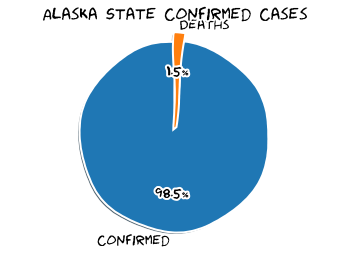

Alaska State Total Population
737438
Alaska State Confirmed
789 (0.106992045432972% of population)
Alaska State Deaths
12 (1.520912547528517% of confirmed)



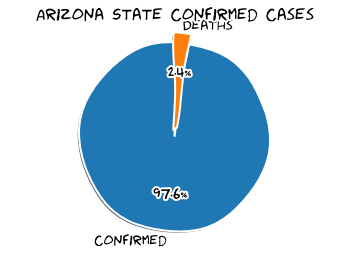

Arizona State Total Population
7171646
Arizona State Confirmed
59999 (0.8366140771588558% of population)
Arizona State Deaths
1463 (2.4383739728995484% of confirmed)



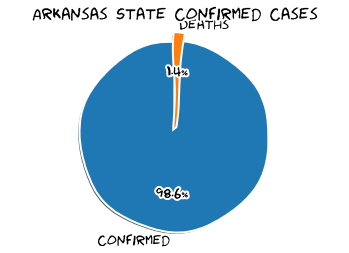

Arkansas State Total Population
3013825
Arkansas State Confirmed
16678 (0.5533831592743441% of population)
Arkansas State Deaths
237 (1.4210336970859816% of confirmed)



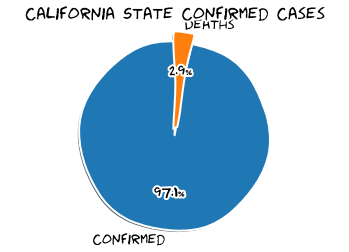

California State Total Population
39557045
California State Confirmed
191921 (0.48517527029635305% of population)
California State Deaths
5655 (2.946524872213046% of confirmed)



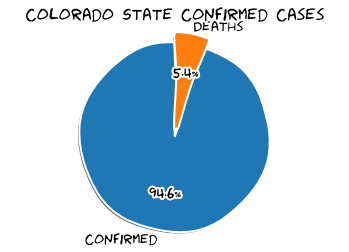

Colorado State Total Population
5695564
Colorado State Confirmed
30877 (0.5421236597464272% of population)
Colorado State Deaths
1665 (5.392363247724844% of confirmed)



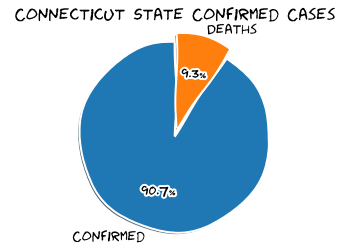

Connecticut State Total Population
3572665
Connecticut State Confirmed
45913 (1.2851190917704292% of population)
Connecticut State Deaths
4287 (9.337224751159802% of confirmed)



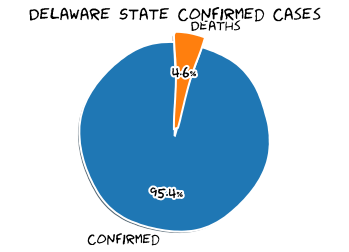

Delaware State Total Population
967171
Delaware State Confirmed
10889 (1.1258608870613367% of population)
Delaware State Deaths
505 (4.637707778492056% of confirmed)



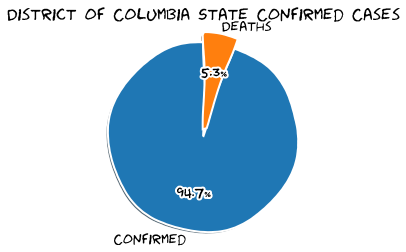

District of Columbia State Total Population
702455
District of Columbia State Confirmed
10128 (1.4418005423834979% of population)
District of Columbia State Deaths
541 (5.341627172195892% of confirmed)



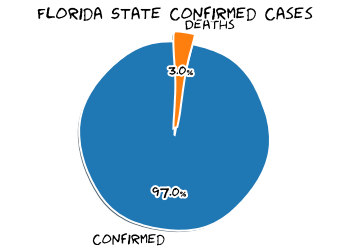

Florida State Total Population
21299325
Florida State Confirmed
109014 (0.5118190365187629% of population)
Florida State Deaths
3281 (3.009705175482048% of confirmed)



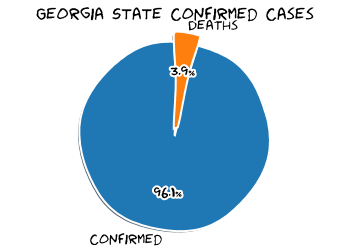

Georgia State Total Population
10519475
Georgia State Confirmed
69392 (0.6596526917930791% of population)
Georgia State Deaths
2702 (3.893820613327185% of confirmed)



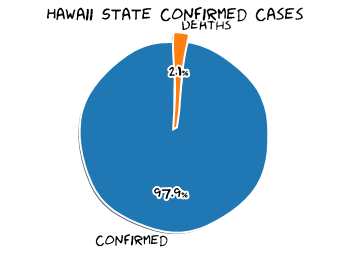

Hawaii State Total Population
1420491
Hawaii State Confirmed
819 (0.057656120313328285% of population)
Hawaii State Deaths
17 (2.0757020757020754% of confirmed)



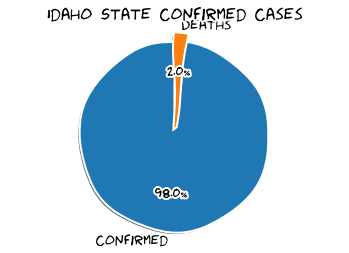

Idaho State Total Population
1754208
Idaho State Confirmed
4402 (0.25093945529834544% of population)
Idaho State Deaths
89 (2.021808268968651% of confirmed)



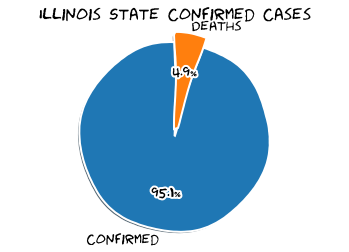

Illinois State Total Population
12741080
Illinois State Confirmed
138546 (1.087396044919269% of population)
Illinois State Deaths
6770 (4.886463701586477% of confirmed)



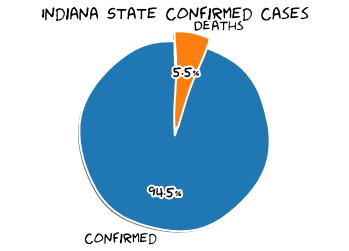

Indiana State Total Population
6691878
Indiana State Confirmed
43140 (0.6446620814067441% of population)
Indiana State Deaths
2386 (5.530829856281873% of confirmed)



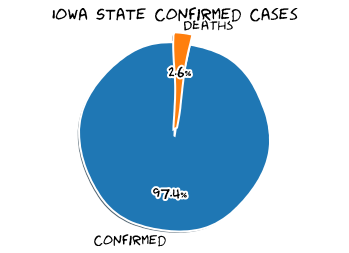

Iowa State Total Population
3156145
Iowa State Confirmed
26469 (0.8386496818111969% of population)
Iowa State Deaths
689 (2.6030450715931845% of confirmed)



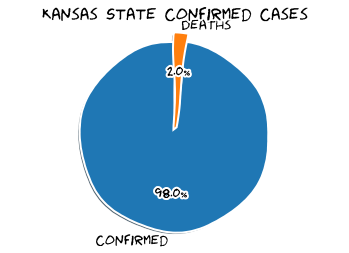

Kansas State Total Population
2911510
Kansas State Confirmed
12872 (0.4421073600983682% of population)
Kansas State Deaths
259 (2.012119328775637% of confirmed)



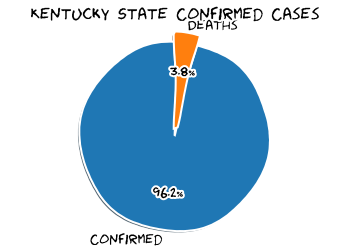

Kentucky State Total Population
4468402
Kentucky State Confirmed
14141 (0.31646660260200404% of population)
Kentucky State Deaths
537 (3.79746835443038% of confirmed)



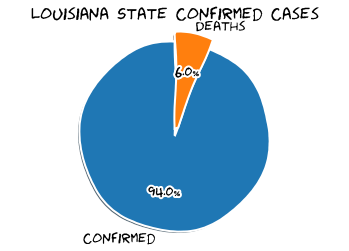

Louisiana State Total Population
4659978
Louisiana State Confirmed
52477 (1.1261211962803257% of population)
Louisiana State Deaths
3152 (6.00644091697315% of confirmed)



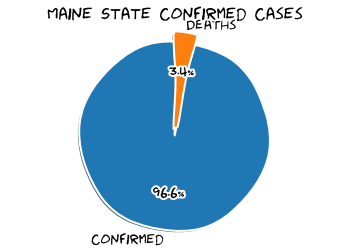

Maine State Total Population
1338404
Maine State Confirmed
3017 (0.225417736348666% of population)
Maine State Deaths
103 (3.413987404706662% of confirmed)



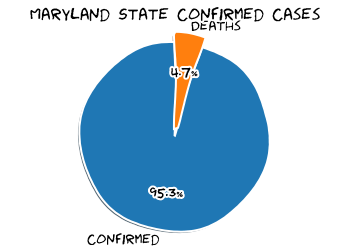

Maryland State Total Population
6042718
Maryland State Confirmed
65337 (1.0812518472647574% of population)
Maryland State Deaths
3084 (4.720143257266174% of confirmed)



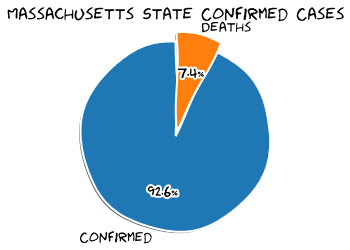

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
107611 (1.559094131407479% of population)
Massachusetts State Deaths
7937 (7.375640036799212% of confirmed)



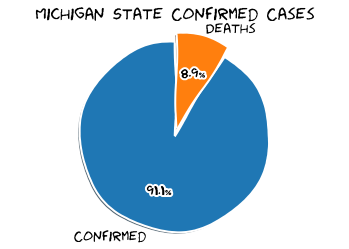

Michigan State Total Population
9995915
Michigan State Confirmed
68555 (0.6858301616210222% of population)
Michigan State Deaths
6114 (8.918386696812778% of confirmed)



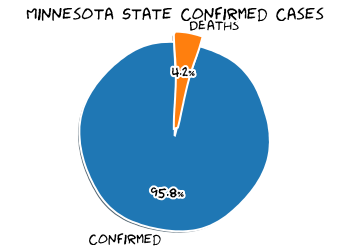

Minnesota State Total Population
5611179
Minnesota State Confirmed
33763 (0.601709551593346% of population)
Minnesota State Deaths
1429 (4.232443799425407% of confirmed)



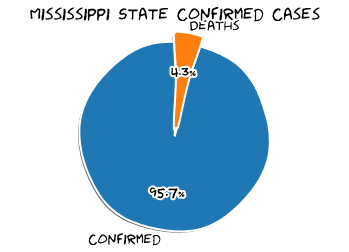

Mississippi State Total Population
2986530
Mississippi State Confirmed
23424 (0.7843216040019689% of population)
Mississippi State Deaths
1011 (4.31608606557377% of confirmed)



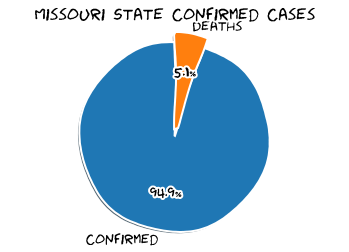

Missouri State Total Population
6126452
Missouri State Confirmed
19300 (0.3150273600446066% of population)
Missouri State Deaths
985 (5.103626943005182% of confirmed)



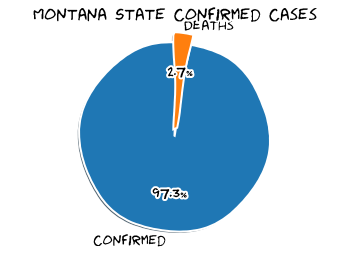

Montana State Total Population
1062305
Montana State Confirmed
766 (0.07210735146685746% of population)
Montana State Deaths
21 (2.741514360313316% of confirmed)



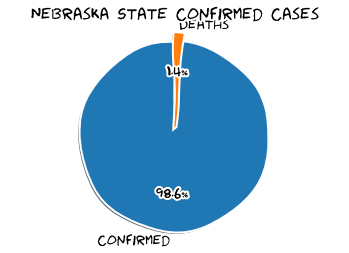

Nebraska State Total Population
1929268
Nebraska State Confirmed
18099 (0.9381278287930968% of population)
Nebraska State Deaths
256 (1.4144427868943035% of confirmed)



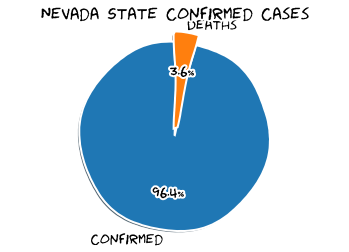

Nevada State Total Population
3034392
Nevada State Confirmed
13528 (0.44582242505253106% of population)
Nevada State Deaths
489 (3.6147250147841516% of confirmed)



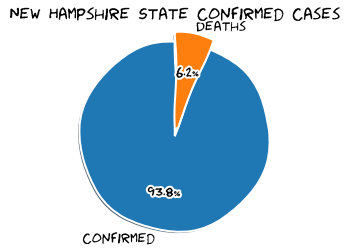

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
5571 (0.41070199003581387% of population)
New Hampshire State Deaths
343 (6.156883862861245% of confirmed)



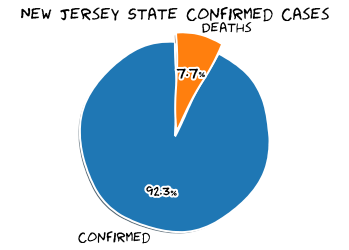

New Jersey State Total Population
8908520
New Jersey State Confirmed
169892 (1.907073228774252% of population)
New Jersey State Deaths
13076 (7.696654345113366% of confirmed)



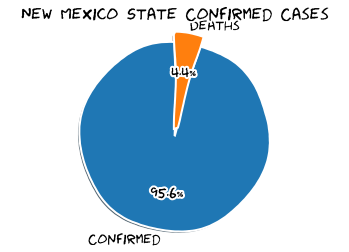

New Mexico State Total Population
2095428
New Mexico State Confirmed
10838 (0.5172213027601044% of population)
New Mexico State Deaths
476 (4.391954235098726% of confirmed)



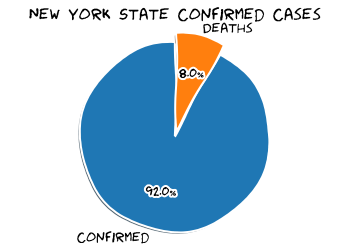

New York State Total Population
19542209
New York State Confirmed
389666 (1.9939711012199286% of population)
New York State Deaths
31257 (8.021485066698146% of confirmed)



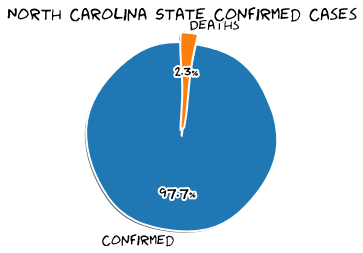

North Carolina State Total Population
10383620
North Carolina State Confirmed
56301 (0.5422097495863677% of population)
North Carolina State Deaths
1322 (2.3480932843111137% of confirmed)



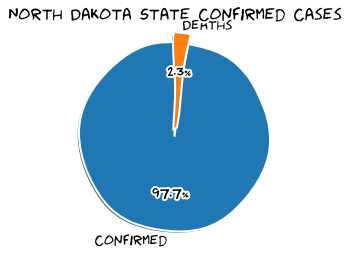

North Dakota State Total Population
760077
North Dakota State Confirmed
3362 (0.44232360668721726% of population)
North Dakota State Deaths
78 (2.3200475907198097% of confirmed)



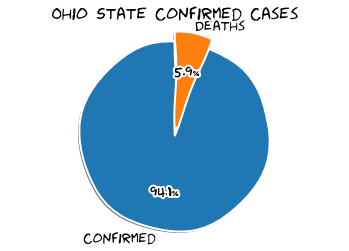

Ohio State Total Population
11689442
Ohio State Confirmed
46759 (0.4000105394252352% of population)
Ohio State Deaths
2755 (5.891913856156035% of confirmed)



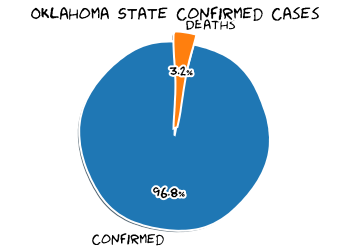

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
11514 (0.29200530854187806% of population)
Oklahoma State Deaths
372 (3.2308494007295465% of confirmed)



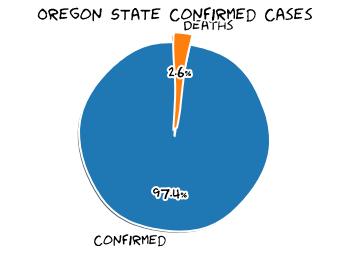

Oregon State Total Population
4190713
Oregon State Confirmed
7444 (0.17763087092816904% of population)
Oregon State Deaths
195 (2.6195593766792045% of confirmed)



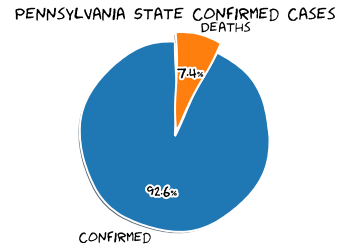

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
87685 (0.6846614289306054% of population)
Pennsylvania State Deaths
6518 (7.433426469749673% of confirmed)



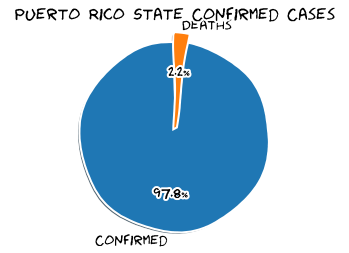

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
6820 (0.213448307483241% of population)
Puerto Rico State Deaths
149 (2.1847507331378297% of confirmed)



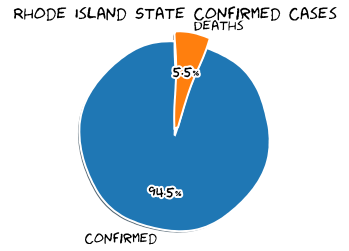

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
16606 (1.5705820876465386% of population)
Rhode Island State Deaths
912 (5.491990846681922% of confirmed)



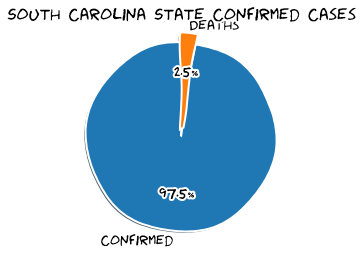

South Carolina State Total Population
5084127
South Carolina State Confirmed
27842 (0.5476259739381019% of population)
South Carolina State Deaths
683 (2.453128367214999% of confirmed)



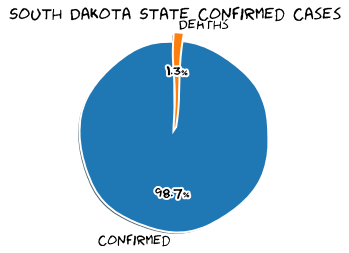

South Dakota State Total Population
882235
South Dakota State Confirmed
6419 (0.7275839203840246% of population)
South Dakota State Deaths
84 (1.3086150490730644% of confirmed)



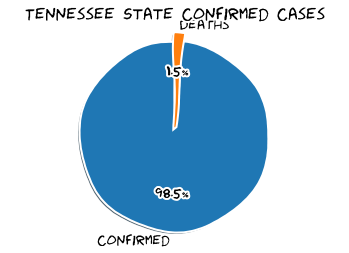

Tennessee State Total Population
6770010
Tennessee State Confirmed
37235 (0.5499991875935191% of population)
Tennessee State Deaths
556 (1.4932187458036794% of confirmed)



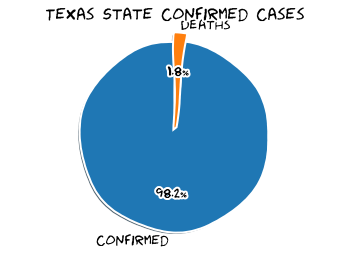

Texas State Total Population
28701845
Texas State Confirmed
122932 (0.42830696075461355% of population)
Texas State Deaths
2236 (1.8188917450297726% of confirmed)



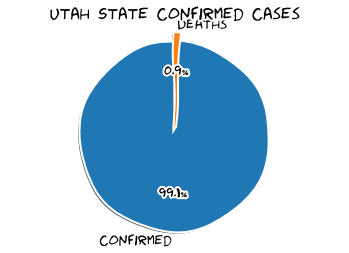

Utah State Total Population
3161105
Utah State Confirmed
18783 (0.5941909553779453% of population)
Utah State Deaths
163 (0.8678059947825161% of confirmed)



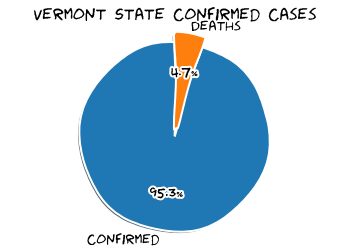

Vermont State Total Population
626299
Vermont State Confirmed
1184 (0.18904708453949312% of population)
Vermont State Deaths
56 (4.72972972972973% of confirmed)



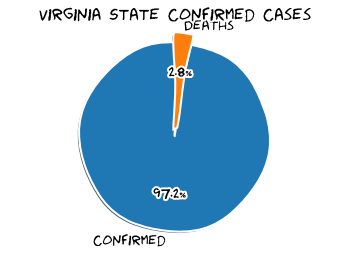

Virginia State Total Population
8517685
Virginia State Confirmed
59514 (0.6987109760457214% of population)
Virginia State Deaths
1661 (2.79093994690325% of confirmed)



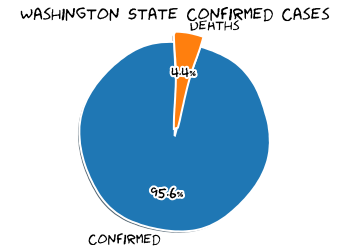

Washington State Total Population
7535591
Washington State Confirmed
29386 (0.38996277796923956% of population)
Washington State Deaths
1284 (4.369427618593888% of confirmed)



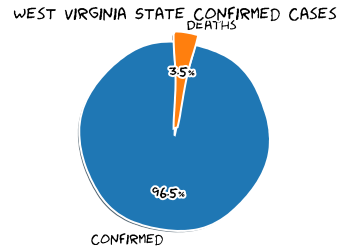

West Virginia State Total Population
1805832
West Virginia State Confirmed
2611 (0.14458709337302694% of population)
West Virginia State Deaths
92 (3.523554193795481% of confirmed)



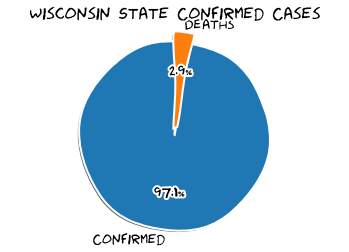

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
25763 (0.44315298281537263% of population)
Wisconsin State Deaths
757 (2.938322400341575% of confirmed)



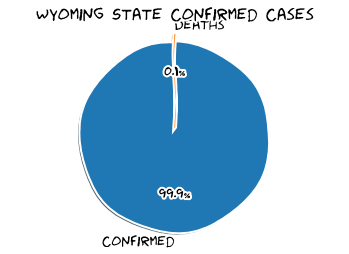

Wyoming State Total Population
577737
Wyoming State Confirmed
1254 (0.21705378052643332% of population)
Wyoming State Deaths
1 (0.07974481658692185% of confirmed)



In [10]:
for i in states:
    state_details(i)

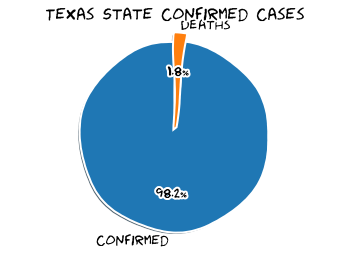

Texas State Total Population
28701845
Texas State Confirmed
122932 (0.42830696075461355% of population)
Texas State Deaths
2236 (1.8188917450297726% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
2369795
US Deaths
121609

New York City Confirmed
213348
New York City Deaths
22365

Philippines Confirmed
32295
Philippines Deaths
1204



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 9330883},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 479496},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-06-24T19:34:51.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 4683736},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-06-24 04:33:28,34.22333378,-82.46170658,86,0,0,86,"Abbeville, South Carolina, US",350.6339951889754,0.0
1,22001,Acadia,Louisiana,US,2020-06-24 04:33:28,30.2950649,-92.41419698,705,34,0,671,"Acadia, Louisiana, US",1136.2720606011765,4.822695035460993
2,51001,Accomack,Virginia,US,2020-06-24 04:33:28,37.76707161,-75.63234615,1033,14,0,1019,"Accomack, Virginia, US",3196.558980071791,1.3552758954501452
3,16001,Ada,Idaho,US,2020-06-24 04:33:28,43.4526575,-116.24155159999998,1307,22,0,1285,"Ada, Idaho, US",271.3943690340478,1.6832440703902065
4,19001,Adair,Iowa,US,2020-06-24 04:33:28,41.33075609,-94.47105874,12,0,0,12,"Adair, Iowa, US",167.78523489932886,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,,,,West Bank and Gaza,2020-06-24 04:33:28,31.9522,35.2332,1169,3,442,724,West Bank and Gaza,22.915206287822834,0.2566295979469632
3757,,,,Western Sahara,2020-06-24 04:33:28,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3758,,,,Yemen,2020-06-24 04:33:28,15.552726999999999,48.516388,992,261,356,375,Yemen,3.325960786922322,26.31048387096774
3759,,,,Zambia,2020-06-24 04:33:28,-13.133897,27.849332,1477,18,1213,246,Zambia,8.03417936814035,1.2186865267433988


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593030826000,40.767273,-73.971526,213348,0,22365,190983,New York City,36061,"New York City, New York, US",2559.106191,None,None,84036061,USA
1,California,US,1593030826000,34.308284,-118.228241,88512,0,3172,85340,Los Angeles,06037,"Los Angeles, California, US",881.672045,None,None,84006037,USA
2,Illinois,US,1593030826000,41.841448,-87.816588,88138,0,4478,83660,Cook,17031,"Cook, Illinois, US",1711.340050,None,None,84017031,USA
3,New York,US,1593030826000,40.740665,-73.589419,41585,0,2180,39405,Nassau,36059,"Nassau, New York, US",3064.652110,None,None,84036059,USA
4,New York,US,1593030826000,40.883201,-72.801217,41101,0,1972,39129,Suffolk,36103,"Suffolk, New York, US",2783.487212,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,Montana,US,1593027291000,48.364351,-106.666963,1,0,0,1,Valley,30105,"Valley, Montana, US",13.520822,None,None,84030105,USA
3041,Kansas,US,1593027291000,39.784208,-97.087532,1,0,0,1,Washington,20201,"Washington, Kansas, US",18.497965,None,None,84020201,USA
3042,Wyoming,US,1593027291000,43.839612,-104.567488,1,0,0,1,Weston,56045,"Weston, Wyoming, US",14.436264,None,None,84056045,USA
3043,Montana,US,1593027291000,46.466525,-109.846464,1,0,0,1,Wheatland,30107,"Wheatland, Montana, US",47.036689,None,None,84030107,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593030826000,40.767273,-73.971526,213348,0,22365,190983,New York City,36061,"New York City, New York, US",2559.106191,None,None,84036061,USA
3,New York,US,1593030826000,40.740665,-73.589419,41585,0,2180,39405,Nassau,36059,"Nassau, New York, US",3064.652110,None,None,84036059,USA
4,New York,US,1593030826000,40.883201,-72.801217,41101,0,1972,39129,Suffolk,36103,"Suffolk, New York, US",2783.487212,None,None,84036103,USA
6,New York,US,1593030826000,41.162784,-73.757417,34597,0,1416,33181,Westchester,36119,"Westchester, New York, US",3575.895137,None,None,84036119,USA
26,New York,US,1593030826000,41.150279,-74.025605,13534,0,667,12867,Rockland,36087,"Rockland, New York, US",4154.222518,None,None,84036087,USA
39,New York,US,1593030826000,41.403375,-74.302408,10669,0,473,10196,Orange,36071,"Orange, New York, US",2771.600769,None,None,84036071,USA
67,New York,US,1593030826000,42.762490,-78.730637,7108,0,632,6476,Erie,36029,"Erie, New York, US",773.700286,None,None,84036029,USA
107,New York,US,1593030826000,41.764861,-73.743567,4158,0,151,4007,Dutchess,36027,"Dutchess, New York, US",1413.237803,None,None,84036027,USA
119,New York,US,1593030826000,43.146389,-77.693229,3567,0,259,3308,Monroe,36055,"Monroe, New York, US",480.876822,None,None,84036055,USA
150,New York,US,1593030826000,43.004919,-76.199712,2734,0,182,2552,Onondaga,36067,"Onondaga, New York, US",593.666400,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

389666

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593030826000,40.767273,-73.971526,213348,0,22365,190983,New York City,36061,"New York City, New York, US",2559.106191,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
60,None,Philippines,1593027291000,12.879721,121.774017,32295,8656,1204,22435.0,None,None,Philippines,29.471327,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
